In [1]:
import numpy as np
import datetime as dt
from scipy import signal
import matplotlib.pyplot as pl
import matplotlib.dates as mdates

In [ ]:
delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null = np.genfromtxt('delphi_phase_null.csv', delimiter=",", dtype=float).flatten()
is_plateau = np.genfromtxt('psync.txt', delimiter=",", dtype=float).flatten()

# Read data and analyse
dvolc = np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
dvolc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()
delphi_hist_dist_2 = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_dist_2 = ( delphi_hist_null + np.pi) % (2 * np.pi )

delphi_hist_dist_2 = delphi_hist_dist_2 / (2*np.pi)
delphi_hist_null_dist_2 = delphi_hist_null_dist_2 / (2*np.pi)

In [5]:
def delphi_timeseries(ct, del_phi, te, volc_time, dvolc_nh, dvolc_sh, dvolc_tropical, 
                     delphi_hist_dist_2, delphi_hist_null_dist_2):
    """
    Plots the instantaneous phase diff with periods of phase sync highlighted.
    """
    # set up figure
    fig = pl.figure(figsize=[7.08, 9.0])
    axlabfs, tiklabfs, splabfs = 4, 4, 4
    start_year = 851
    end_year = 1850

    # set up ax1 and plot delPhi and event series there
    ax1 = fig.add_axes([0.1, 0.53, 0.85, 0.4])
    ax1.plot(ct, -del_phi/6.28,
             c="Maroon", zorder=5, linewidth=0.4
             )
    ylo, yhi = ax1.get_ylim()
    ax1.bar(te,
            width = 200 * np.ones(len(te)),
            height = (yhi - ylo) * np.ones(len(te)),
            bottom = ylo * np.ones(len(te)),
            edgecolor="none", facecolor="Turquoise",
            zorder=1,)
    # set up second ax2 and plot the volcanic radiative forcing 
    ax2 = fig.add_axes([0.1, 0.43, 0.85, 0.1])
    ax3 = fig.add_axes([0.1, 0.13, 0.425, 0.3])
    ax4 = fig.add_axes([0.525, 0.13, 0.425, 0.3])
    ax2.plot(volc_time[:1000], dvolc_tropical[:1000],zorder=5, linewidth=0.5, color='red', label='Tropical')
    ax2.plot(volc_time[:1000], dvolc_nh[:1000], zorder=5, linewidth=0.5, color='blue', label='NH')
    ax2.plot(volc_time[:1000], dvolc_sh[:1000],  zorder=5, linewidth=0.5, color='green', label='SH')
    
    values_hist, bins_hist, _ = ax3.hist(delphi_hist_dist_2, normed=True, bins=100, alpha=0.5, label='historical(past 1000)', range=(0,1))
    values_hist_null, bins_hist_null, _ = ax3.hist(delphi_hist_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='twin_surrogates', range=(0,1))

    ax3.set_xlabel('Relative phase difference')
    ax3.set_ylabel('Probability Density')
    ax3.legend(prop={'size': 10})
    ax3.set_xticks(np.arange(0, 1.1, step=0.25))
    ax3.set_xticklabels(['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
        
    ax2.legend(loc='center left',  prop={'size': 10})
    ylo, yhi = ax1.get_ylim()
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax1.set_xlim(xlo, xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=20, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax1.xaxis.set_major_locator(XMajorLocator)
    ax1.xaxis.set_minor_locator(XMinorLocator)
    ax1.xaxis.set_major_formatter(XMajorFormatter)
    #ax1.set_ylim(ylo, 1900)
    #ax1.set_ylim(ylo, 1900)
    #ax1.set_ylim(ylo, 4)
    ax1.xaxis.tick_top()
    
    #ax1.set_xticklabels([]) 
    #ax1.set_ylim(-12,12 )
    ax1.grid(which="both")
    ax1.tick_params(which="major", size=8, direction="out")
    ax1.tick_params(which="minor", size=5, direction="out")
    ax1.tick_params(axis="both", labelsize=tiklabfs)
#    ax1.set_xlabel("Time", fontsize=axlabfs)
    ax1.set_ylabel(r"$\Delta\phi = \phi_{NINO} - \phi_{ISMR}[2\pi]$")
    #pl.rcParams.update({'font.size': 12})
#   ax1.set_ylabel(r"$\Delta\phi = \phi_{ISMR} - \phi_{NINO}[2\pi]$",
    #ax1.set_ylabel("Phase Locking Value \n (PLV)", fontsize=axlabfs)


    # prettify ax2
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax2.set_xlim(xlo,xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=50, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax2.xaxis.set_major_locator(XMajorLocator)
    ax2.xaxis.set_minor_locator(XMinorLocator)
    ax2.xaxis.set_major_formatter(XMajorFormatter)
    ylo, yhi = ax2.get_ylim()
    ax2.set_ylim(ylo, yhi)
    ax2.tick_params(axis="both", labelsize=tiklabfs)
    ax2.grid(which="both")
    ax2.set_ylabel("VRF (W/$m^2$)", fontsize=axlabfs)
    ax2.xaxis.set_label_position('bottom')
    ax2.set_xlabel("Time", fontsize=10)
    for ax in ([ax1, ax2, ax3]):
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
           ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(10)
    return None

def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time

def yearly_time_axis(dvolc, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dvolc)):
        y = time[i - 1].year
        y += 1
        time.append(dt.datetime(y, 1, 15))
    time = np.array(time)

    return time



dvolc_tropical = dvolc.copy()
dvolc_nh = dvolc.copy()
dvolc_sh = dvolc.copy()

is_tropical = np.zeros((dvolc.shape[0]))
is_nh = np.zeros((dvolc.shape[0]))
is_sh = np.zeros((dvolc.shape[0]))

is_tropical[dvolc_source==1.0] = 1.0
is_nh[dvolc_source==2.0] = 1.0
is_sh[dvolc_source==3.0] = 1.0

for i in range(dvolc.shape[0]):
    #print("i = ", i)
    dvolc_tropical[i] = dvolc[i] * is_tropical[i]
    dvolc_nh[i] = dvolc[i] * is_nh[i]
    dvolc_sh[i] = dvolc_sh[i] * is_sh[i]
#print(dvolc_tropical[0:100])
#print(dvolc_nh[0:100])
#print(dvolc_sh[0:100])


idx = (is_plateau==1.0)
ct      = common_time_axis(delphi_hist)
te = ct[idx]
volc_time = yearly_time_axis(dvolc)
# 5 year window after volcanic eruption selected

/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


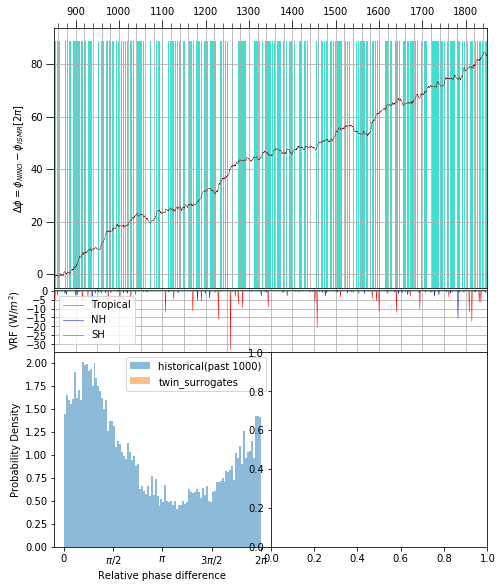

In [6]:
delphi_timeseries(ct, delphi_hist, te, volc_time, dvolc_nh, dvolc_sh, dvolc_tropical,
                 delphi_hist_dist_2, delphi_hist_null_dist_2)
pl.savefig('fig1_ipsl_dist.pdf', format='pdf', dpi=1000)

In [ ]:
from scipy import stats
print(stats.ks_2samp(delphi_hist_dist_2, delphi_hist_null_dist_2))
#print(stats.ks_2samp(delphi_pi_dist_2, delphi_pi_null_dist_2))
#print(stats.ks_2samp(delphi_hist_dist_2, delphi_pi_dist_2))


In [53]:
#!export PATH=/usr/bin/tex:$PATH

In [10]:
delphi_hist_null

array([nan, nan, nan, ..., nan, nan, nan])

In [9]:
delphi_hist_null = np.genfromtxt('delphi_phase_null.csv', delimiter=",", dtype=float).flatten()